Number of records retrieved: 29845
       coin_status  time_spent       level
count      29845.0     29845.0     29845.0
mean   3690.273111   28.782141  232.130206
std    7660.967431    5.065267  172.242655
min            0.0         0.0         1.0
25%          665.0        30.0       104.0
50%         1416.0        30.0       197.0
75%         3857.0        30.0       318.0
max       584165.0        30.0       925.0


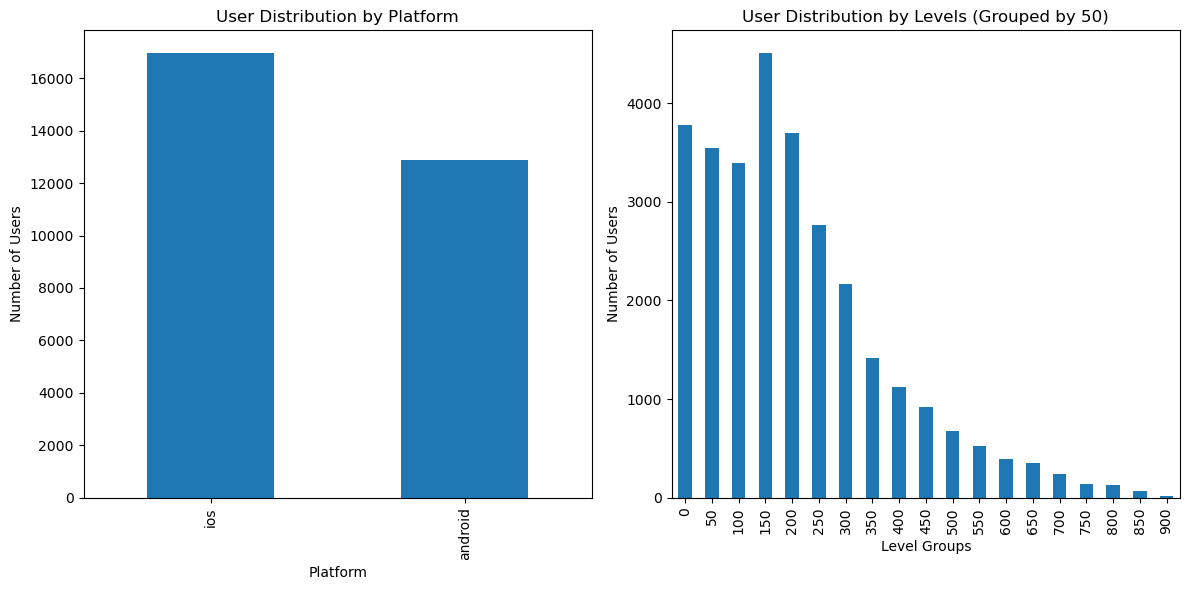

In [4]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to the service account JSON file
service_account_path = "C:/Users/GalipŞahin/Desktop/Kişisel/Dream/galipsahin15.json"

# Create a BigQuery client
client = bigquery.Client.from_service_account_json(service_account_path)

# Query to retrieve data with a 0.0001% random sampling
query = """
    SELECT * FROM `casedreamgames.Analytics.dataset_session`
    WHERE RAND() <= 0.0001
"""

# Execute the query and retrieve the results as a DataFrame
df_session = client.query(query).to_dataframe()

# Print the number of records retrieved
print(f"Number of records retrieved: {df_session.shape[0]}")

# Convert date columns to datetime format
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Visualize the data in Jupyter Notebook

# Basic Statistical Summaries
print(df_session.describe())

# User distribution by platform
platform_dist = df_session['platform'].value_counts()

# Group levels into bins of 50
df_session['level_group'] = (df_session['level'] // 50) * 50
level_dist_grouped = df_session['level_group'].value_counts().sort_index()

# Calculate total session time per user
user_session_time = df_session.groupby('user_id')['time_spent'].sum().reset_index()

# Correlation analysis
correlation_matrix = df_session[['coin_status', 'time_spent', 'level']].corr()

# Visualization
plt.figure(figsize=(12, 6))

# Platform distribution
plt.subplot(1, 2, 1)
platform_dist.plot(kind='bar')
plt.title('User Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Users')

# Level distribution
plt.subplot(1, 2, 2)
level_dist_grouped.plot(kind='bar')
plt.title('User Distribution by Levels (Grouped by 50)')
plt.xlabel('Level Groups')
plt.ylabel('Number of Users')

plt.tight_layout()
plt.show()


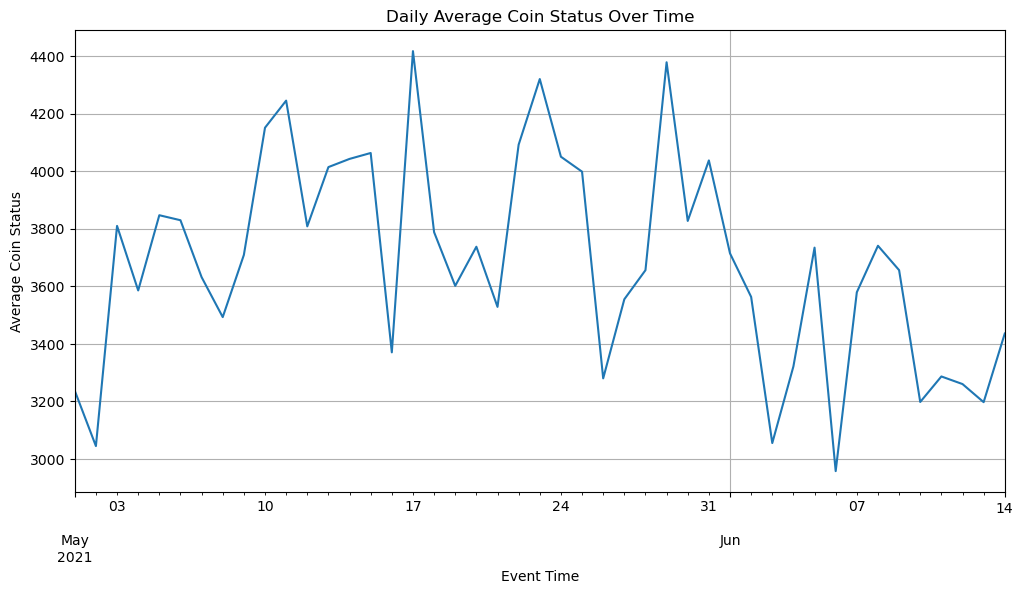

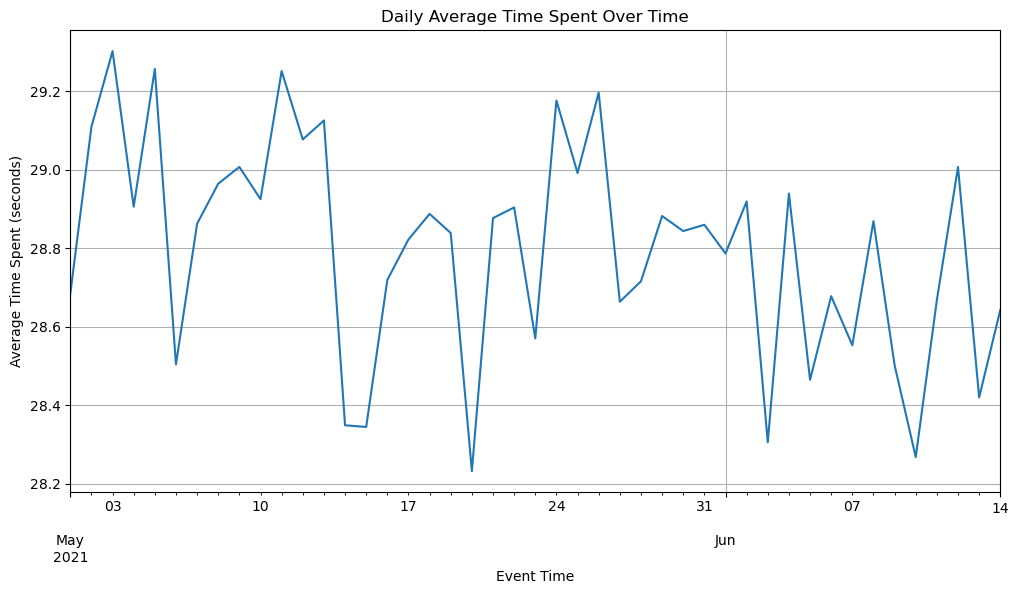

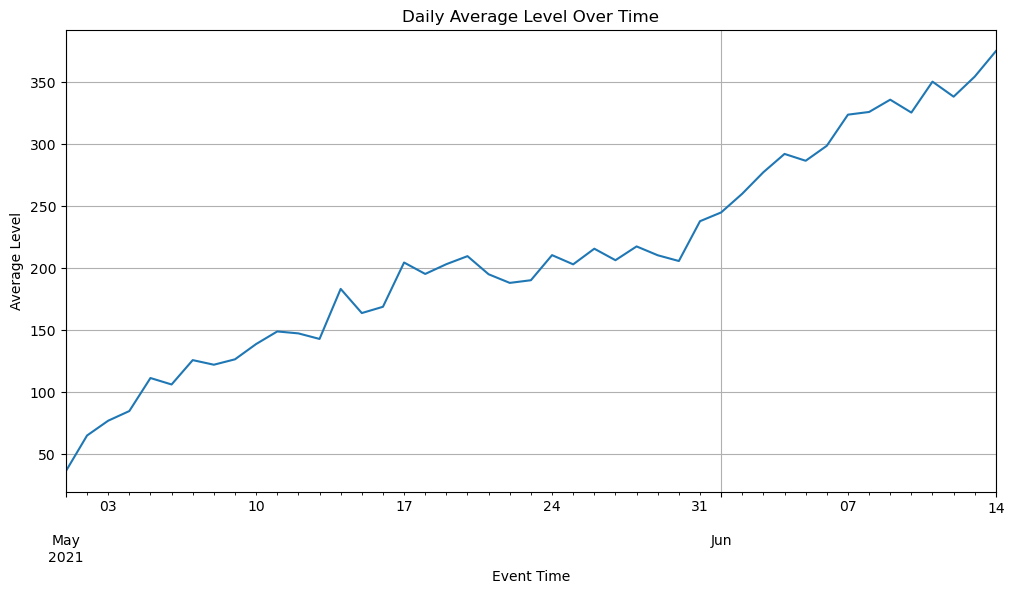

In [5]:
# Tarih sütunlarını datetime formatına dönüştürme
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Zaman serisi grafiği için veriyi yeniden numaralandırma
df_session.set_index('event_time', inplace=True)

# coin_status zaman serisi grafiği
plt.figure(figsize=(12, 6))
df_session['coin_status'].resample('D').mean().plot()
plt.title('Daily Average Coin Status Over Time')
plt.xlabel('Event Time')
plt.ylabel('Average Coin Status')
plt.grid(True)
plt.show()

# time_spent zaman serisi grafiği
plt.figure(figsize=(12, 6))
df_session['time_spent'].resample('D').mean().plot()
plt.title('Daily Average Time Spent Over Time')
plt.xlabel('Event Time')
plt.ylabel('Average Time Spent (seconds)')
plt.grid(True)
plt.show()

# level zaman serisi grafiği
plt.figure(figsize=(12, 6))
df_session['level'].resample('D').mean().plot()
plt.title('Daily Average Level Over Time')
plt.xlabel('Event Time')
plt.ylabel('Average Level')
plt.grid(True)
plt.show()


Number of records retrieved: 29518


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

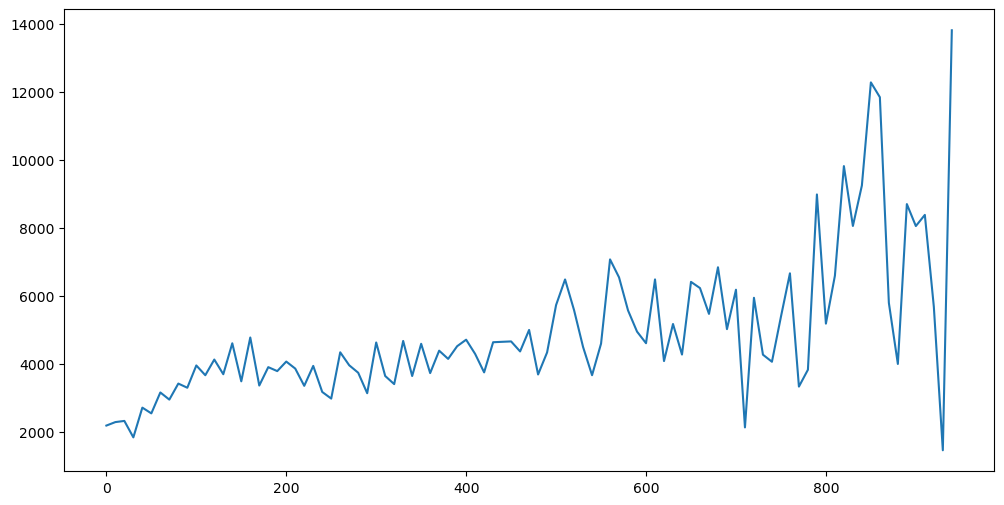

In [11]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Specify the path to the service account JSON file
service_account_path = "C:/Users/GalipŞahin/Desktop/Kişisel/Dream/galipsahin15.json"

# Create a BigQuery client
client = bigquery.Client.from_service_account_json(service_account_path)

# Query to retrieve data with a 0.0001% random sampling
query = """
    SELECT * FROM `casedreamgames.Analytics.dataset_session`
    WHERE RAND() <= 0.0001
"""

# Execute the query and retrieve the results as a DataFrame
df_session = client.query(query).to_dataframe()

# Print the number of records retrieved
print(f"Number of records retrieved: {df_session.shape[0]}")

# Convert date columns to datetime format
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Group levels into bins of 10
df_session['level_group'] = (df_session['level'] // 10) * 10

# Calculate average coin_status for each level group
level_coin_status = df_session.groupby('level_group')['coin_status'].mean().reset_index()

# Plot the relationship between coin_status and level_group
plt.figure(figsize=(12, 6))
sns.lineplot(x='level_group', y='coin_status', data=level_coin_status)
plt.title('Relationship Between Coin Status and Level (Grouped by 10)')
plt.xlabel('Level Groups')
plt.ylabel('Average Coin Status')
plt.grid(True)
plt.show()


Çekilen veri sayısı: 30006


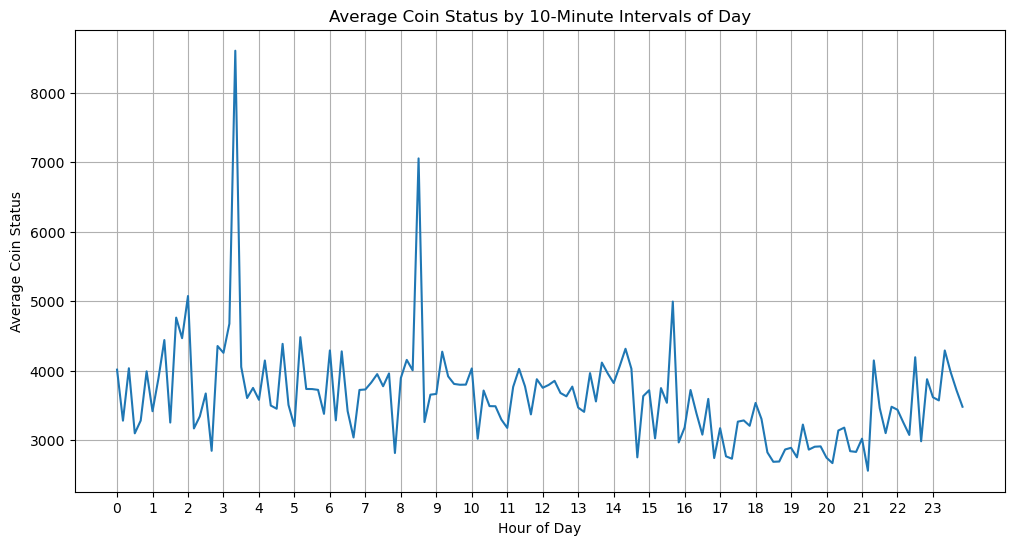

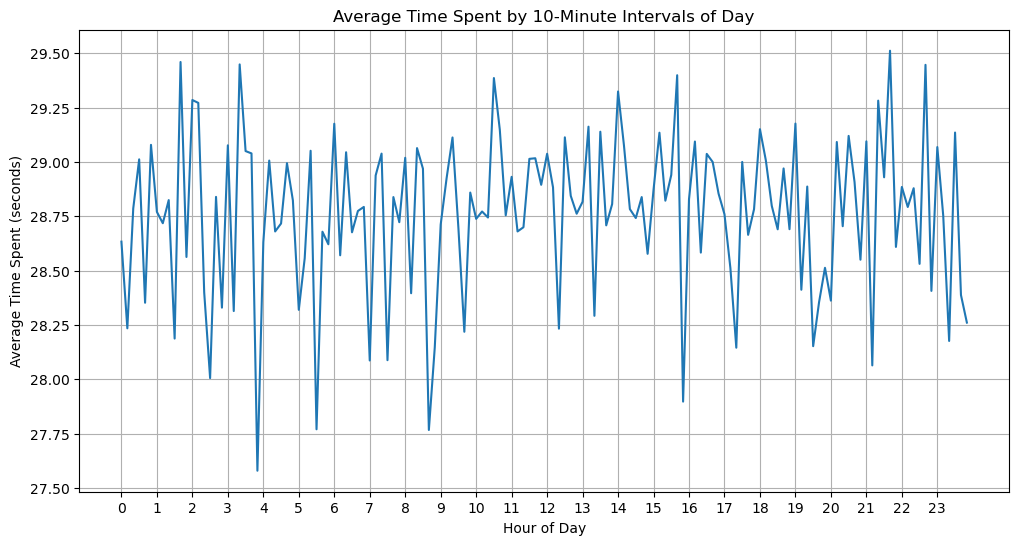

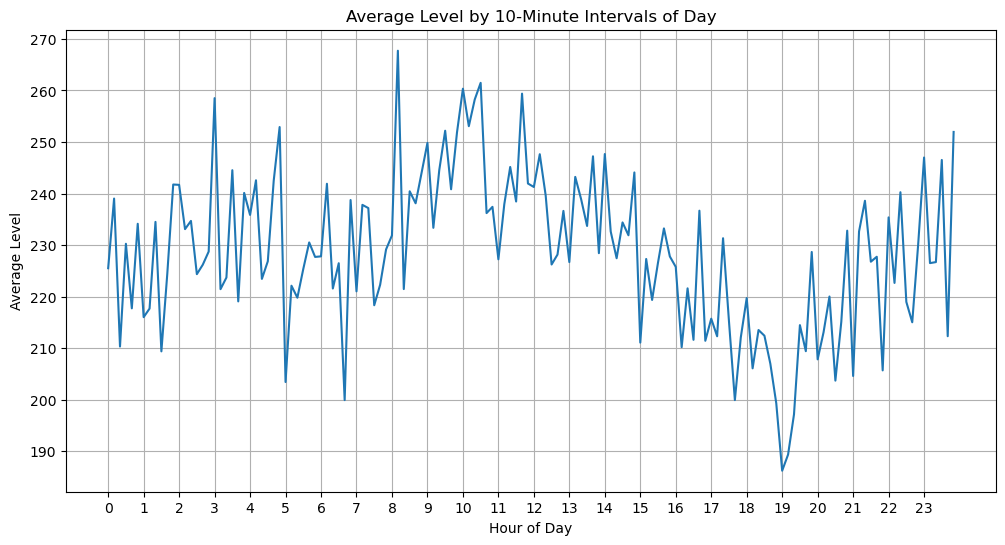

In [10]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hizmet hesabı JSON dosyasının yolunu belirtin
service_account_path = "C:/Users/GalipŞahin/Desktop/Kişisel/Dream/galipsahin15.json"

# BigQuery istemcisi oluşturma
client = bigquery.Client.from_service_account_json(service_account_path)

# %0.0001 rastgele örnekleme ile veri çekme sorgusu
query = """
    SELECT * FROM `casedreamgames.Analytics.dataset_session`
    WHERE RAND() <= 0.0001
"""

# Sorguyu çalıştır ve sonuçları DataFrame olarak al
df_session = client.query(query).to_dataframe()

# Çekilen veri sayısını yazdır
print(f"Çekilen veri sayısı: {df_session.shape[0]}")

# Tarih sütunlarını datetime formatına dönüştürme
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Zaman serisi grafiği için dakikayı ve saati çıkartma
df_session['time_of_day'] = df_session['event_time'].dt.hour * 60 + df_session['event_time'].dt.minute

# Dakikaları 10 dakikalık gruplar halinde bölelim
df_session['time_group'] = (df_session['time_of_day'] // 10) * 10

# 10 dakikalık ortalama coin_status
time_coin_status = df_session.groupby('time_group')['coin_status'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='time_group', y='coin_status', data=time_coin_status)
plt.title('Average Coin Status by 10-Minute Intervals of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Coin Status')
plt.xticks(ticks=np.arange(0, 1440, 60), labels=[f'{int(t/60)}' for t in np.arange(0, 1440, 60)])
plt.grid(True)
plt.show()

# 10 dakikalık ortalama time_spent
time_time_spent = df_session.groupby('time_group')['time_spent'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='time_group', y='time_spent', data=time_time_spent)
plt.title('Average Time Spent by 10-Minute Intervals of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(ticks=np.arange(0, 1440, 60), labels=[f'{int(t/60)}' for t in np.arange(0, 1440, 60)])
plt.grid(True)
plt.show()

# 10 dakikalık ortalama level
time_level = df_session.groupby('time_group')['level'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='time_group', y='level', data=time_level)
plt.title('Average Level by 10-Minute Intervals of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Level')
plt.xticks(ticks=np.arange(0, 1440, 60), labels=[f'{int(t/60)}' for t in np.arange(0, 1440, 60)])
plt.grid(True)
plt.show()


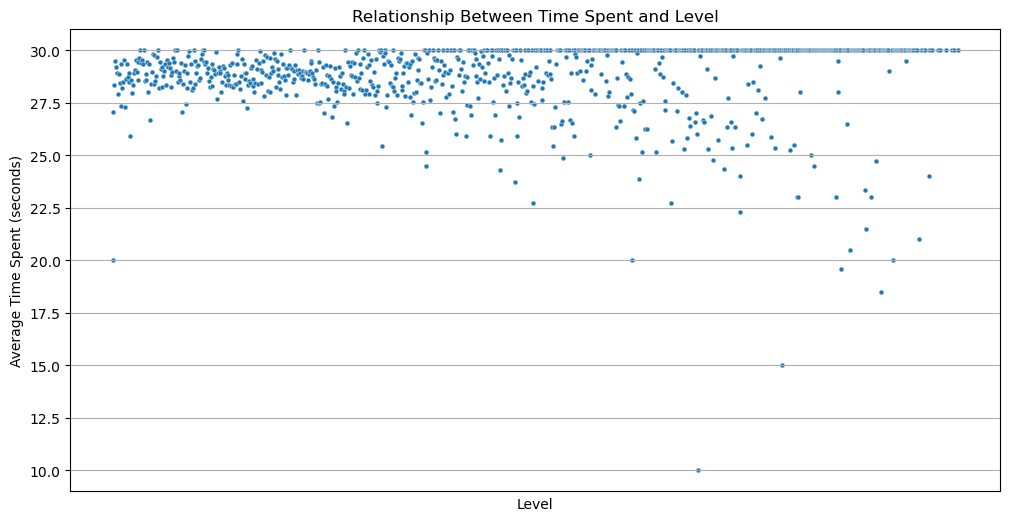

In [12]:
# Convert date columns to datetime format
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Calculate average time_spent for each level
level_time_spent = df_session.groupby('level')['time_spent'].mean().reset_index()

# Plot the relationship between time_spent and level
plt.figure(figsize=(12, 6))
sns.scatterplot(x='level', y='time_spent', data=level_time_spent, s=12.5)  # Set s parameter to 12.5 to reduce the size of the points
plt.title('Relationship Between Time Spent and Level')
plt.xlabel('Level')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks([])  # Remove labels on the X-axis
plt.grid(True)
plt.show()


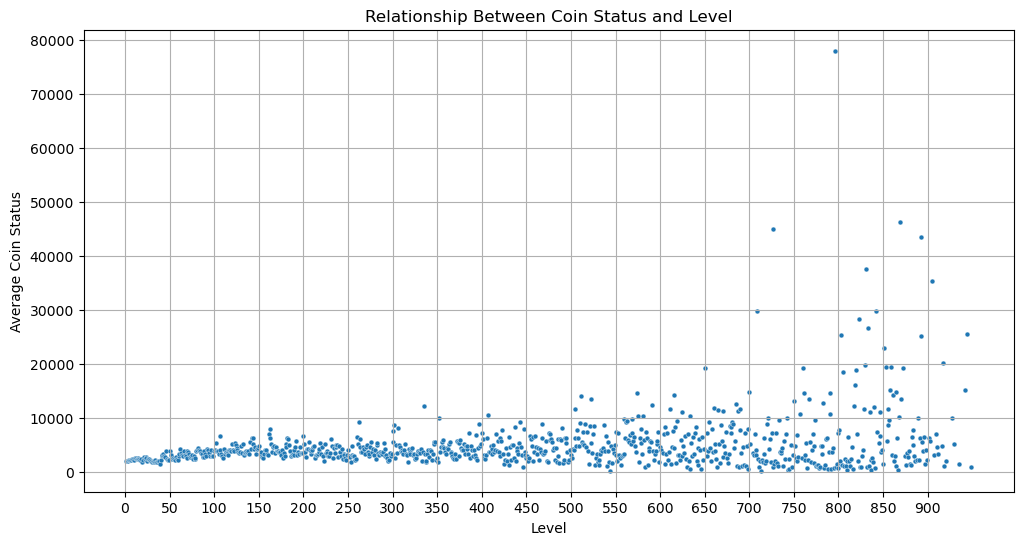

In [13]:
# Convert date columns to datetime format
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Calculate average coin_status for each level
level_coin_status = df_session.groupby('level')['coin_status'].mean().reset_index()

# Plot the relationship between coin_status and level
plt.figure(figsize=(12, 6))
sns.scatterplot(x='level', y='coin_status', data=level_coin_status, s=12.5)  # Reduce the size of the points by half
plt.title('Relationship Between Coin Status and Level')
plt.xlabel('Level')
plt.ylabel('Average Coin Status')
plt.grid(True)

# Set labels on the X-axis in groups of 50 starting from 0
max_level = df_session['level'].max()
xticks = np.arange(0, max_level + 1, 50)
plt.xticks(xticks)

plt.show()


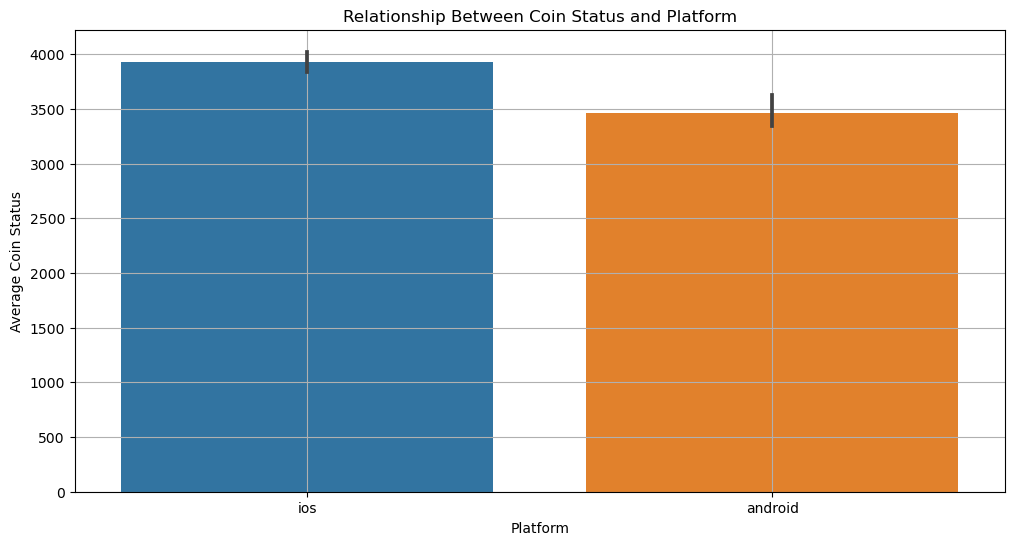

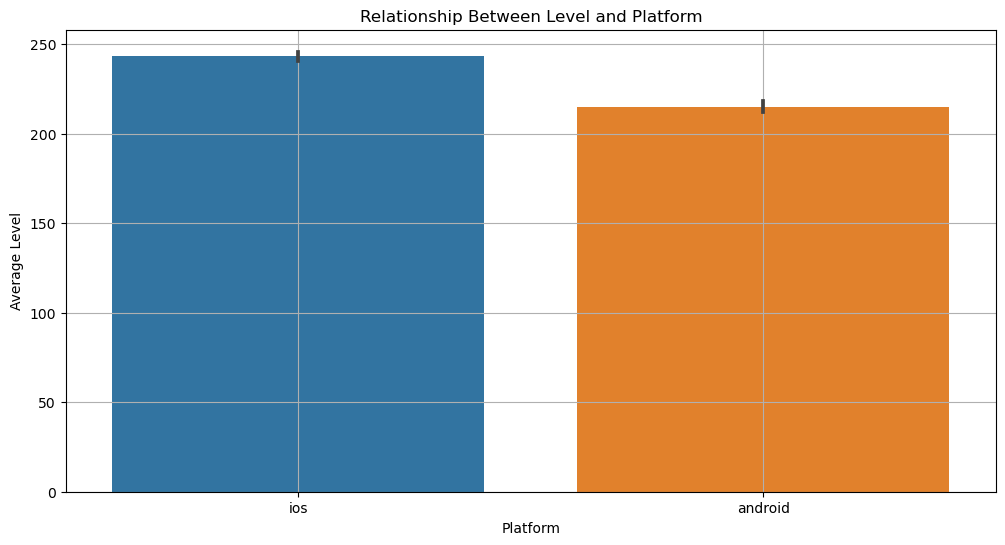

In [14]:
# Convert date columns to datetime format
if 'event_time' in df_session.columns:
    df_session['event_time'] = pd.to_datetime(df_session['event_time'])

# Bar plot showing the relationship between coin_status and platform
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='coin_status', data=df_session, estimator=lambda x: sum(x) / len(x))
plt.title('Relationship Between Coin Status and Platform')
plt.xlabel('Platform')
plt.ylabel('Average Coin Status')
plt.grid(True)
plt.show()

# Bar plot showing the relationship between level and platform
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='level', data=df_session, estimator=lambda x: sum(x) / len(x))
plt.title('Relationship Between Level and Platform')
plt.xlabel('Platform')
plt.ylabel('Average Level')
plt.grid(True)
plt.show()
